# Badanie zależości temperatury wrzenia wody od ciśnienia


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,8)

In [2]:
prs = np.subtract(1015, [950, 900, 810, 660, 490, 255, 160, 0])
temp = [313, 323, 334, 347, 357, 366, 369, 373]

In [3]:
ln_p = np.log(prs)
ln_p

array([4.17438727, 4.74493213, 5.32300998, 5.87211779, 6.26339826,
       6.63331843, 6.75110147, 6.92264389])

In [4]:
yerr = np.divide(20., prs)
yerr

array([0.30769231, 0.17391304, 0.09756098, 0.05633803, 0.03809524,
       0.02631579, 0.02339181, 0.01970443])

In [5]:
inv_t = np.divide(1., temp)
inv_t

array([0.00319489, 0.00309598, 0.00299401, 0.00288184, 0.00280112,
       0.00273224, 0.00271003, 0.00268097])

In [6]:
xerr = np.divide(1, np.divide(1., inv_t**2))
xerr

array([1.02073105e-05, 9.58506264e-06, 8.96410771e-06, 8.30502703e-06,
       7.84627577e-06, 7.46513781e-06, 7.34424688e-06, 7.18757412e-06])

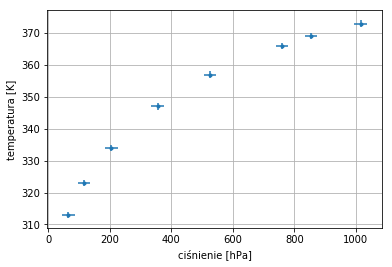

In [7]:
fig = plt.figure()

plt.ylabel('temperatura [K]')
plt.xlabel('ciśnienie [hPa]')
plt.errorbar(x=prs, y=temp, xerr=20, yerr=1, fmt='.')
plt.grid()
plt.show()

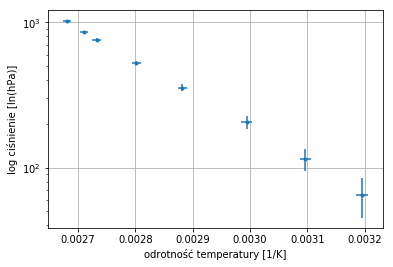

In [8]:
fig = plt.figure()
ax = fig.gca()
ax.set_yscale('log')

plt.xlabel('odrotność temperatury [1/K]')
plt.ylabel('log ciśnienie [ln(hPa)]')
plt.errorbar(y=prs, x=inv_t, yerr=20, xerr=xerr, fmt='.')
plt.grid()
plt.show()

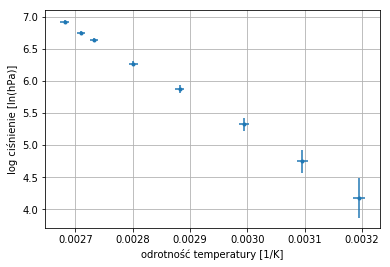

In [9]:
fig = plt.figure()
# ax = fig.gca()
# ax.set_yscale('log')

plt.xlabel('odrotność temperatury [1/K]')
plt.ylabel('log ciśnienie [ln(hPa)]')
plt.errorbar(y=ln_p, x=inv_t, yerr=yerr, xerr=xerr, fmt='.')
plt.grid()
plt.show()

In [14]:
for x, dx in zip(ln_p, yerr):
    print('{:.3f} ± {:.3f}, {:.3f} {:.3f} {}'.format(x, dx, x-dx, x+dx, dx/.1*5))

4.174 ± 0.308, 3.867 4.482 15.384615384615385
4.745 ± 0.174, 4.571 4.919 8.695652173913043
5.323 ± 0.098, 5.225 5.421 4.878048780487805
5.872 ± 0.056, 5.816 5.928 2.8169014084507045
6.263 ± 0.038, 6.225 6.301 1.9047619047619049
6.633 ± 0.026, 6.607 6.660 1.3157894736842104
6.751 ± 0.023, 6.728 6.774 1.1695906432748537
6.923 ± 0.020, 6.903 6.942 0.9852216748768472


In [18]:
for x, dx in zip(inv_t, xerr):
    print('{:.3f} ± {:.3f}, {:.1f}'.format(x*10**3, dx*10**3, dx*10**3/0.1*20))

3.195 ± 0.010, 2.0
3.096 ± 0.010, 1.9
2.994 ± 0.009, 1.8
2.882 ± 0.008, 1.7
2.801 ± 0.008, 1.6
2.732 ± 0.007, 1.5
2.710 ± 0.007, 1.5
2.681 ± 0.007, 1.4


-5256.555431194665 21.008051736381248


NameError: name 't' is not defined

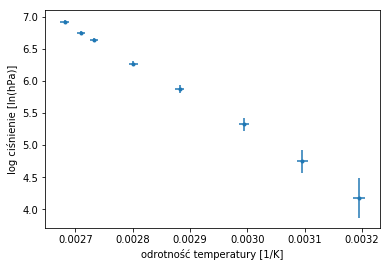

In [24]:
m, b = np.polyfit(inv_t, ln_p, 1)
print(m, b)

fig = plt.figure()
# ax = fig.gca()
# ax.set_yscale('log')

plt.xlabel('odrotność temperatury [1/K]')
plt.ylabel('log ciśnienie [ln(hPa)]')
plt.errorbar(y=ln_p, x=inv_t, yerr=yerr, xerr=xerr, fmt='.')
plt.plot(t, m*t + b, '--')
plt.grid()
plt.show()